In [1]:
import numpy as np
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data_train = pd.read_csv('/home/vanchhit/Downloads/train (1).csv')
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# data=data_train.iloc[:,:-1].values
data_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
ab=data_train["LotFrontage"].mean()
ab=round(ab,2)
ab

70.05

In [7]:
data_train["LotFrontage"]=data_train["LotFrontage"].fillna(ab)

In [8]:
data_train.isnull().sum().head(20)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

In [9]:
# data_train["Alley"].value_counts()
data_train["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Alley', ylabel='count'>

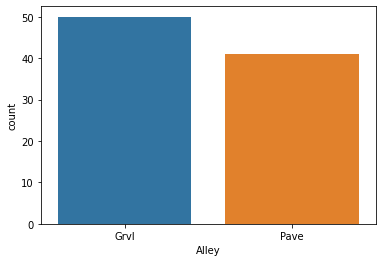

In [10]:
import seaborn as sns
sns.countplot(x=data_train["Alley"])

In [11]:
for x in data_train["Street"]:
    if x=="Pave":
        data_train["Alley"]=data_train["Alley"].fillna("Pave")
    elif x=="Grvl":
        data_train["Alley"]=data_train["Alley"].fillna("Grvl")

In [12]:
data_train.isnull().sum().head(40)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

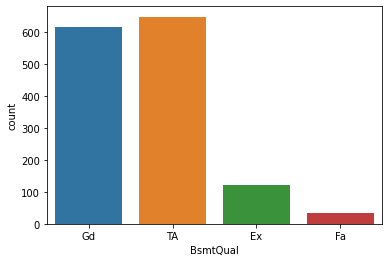

In [13]:
import seaborn as sns
sns.countplot(x=data_train["BsmtQual"])

In [14]:
data_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [15]:
data_train["BsmtQual"]=data_train["BsmtQual"].fillna('TA')

In [16]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [17]:
data_train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [18]:
data_train["BsmtCond"]=data_train["BsmtCond"].fillna('Po')

In [19]:
data_train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [20]:
data_train["BsmtExposure"]=data_train["BsmtExposure"].fillna('Mn')

In [21]:
data_train.isnull().sum().head(45)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
dtype: int64

In [22]:
data_train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [23]:
data_train["BsmtFinType1"]=data_train["BsmtFinType1"].fillna("LwQ")

In [24]:
data_train["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [25]:
data_train["BsmtFinType2"]=data_train["BsmtFinType2"].fillna("ALQ")

In [26]:
data_train.isnull().sum().head(45)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      8
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      1
1stFlrSF        0
2ndFlrSF        0
dtype: int64

In [27]:
data_train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [28]:
data_train["Electrical"]=data_train["Electrical"].fillna('Mix')

In [29]:
data_train.isnull().sum().head(50)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      8
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
dtype: int64

In [30]:
data_train.isnull().sum().tail(40)

CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [31]:
data_train.shape

(1460, 81)

In [32]:
data_train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [33]:
data_train["FireplaceQu"]=data_train["FireplaceQu"].fillna('Po')

In [34]:
data_train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [35]:
data_train["GarageType"]=data_train["GarageType"].fillna('2Types')

In [36]:
data_train["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [37]:
data_train["GarageCond"]=data_train["GarageCond"].fillna('Ex')

In [38]:
data_train.isnull().sum().tail(40)

CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [39]:
data_train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [40]:
# Fin    
data_train["GarageFinish"]=data_train["GarageFinish"].fillna('Fin')

In [41]:
data_train.isnull().sum().tail(40)

CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt        81
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [42]:
data_train["GarageYrBlt"].min()

1900.0

In [43]:
data_train["GarageYrBlt"]=data_train["GarageYrBlt"].fillna('1900.0')

In [44]:
data_train["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [45]:
data_train["GarageQual"]=data_train["GarageQual"].fillna("Gd")

In [46]:
data_train.isnull().sum().tail(40)

CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [47]:
data_train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [48]:
data_train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [49]:
data_train["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [50]:
data_train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [51]:
data_train["PoolQC"]=data_train["PoolQC"].fillna('Fa')
data_train["MiscFeature"]=data_train["MiscFeature"].fillna('TenC')
data_train["Fence"]=data_train["Fence"].fillna('MnWw')

In [52]:
data_train.isnull().sum().tail(40)

CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [53]:
import os
data_train.to_csv(r'House_Data.csv')

In [54]:
# data_train.to_csv(r'House_Data.csv')
from IPython.display import FileLink
FileLink(r'House_Data.csv')

/home/vanchhit/joyconda/House_Data.csv

In [55]:
data_train.isnull().sum().tail(40)

CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [56]:
data_train.isnull().sum().head(40)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      8
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64

In [57]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
data_train["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [59]:
data_train["Alley"].value_counts()

Pave    1410
Grvl      50
Name: Alley, dtype: int64

In [60]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [61]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [62]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Pave,Reg,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Pave,Reg,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Pave,IR1,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Pave,IR1,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Pave,IR1,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Pave,Reg,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,...,0,Fa,MnPrv,TenC,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,...,0,Fa,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,...,0,Fa,MnWw,TenC,0,4,2010,WD,Normal,142125


In [63]:
data_train["MSZoning"]=l1.fit_transform(data_train["MSZoning"])
data_train["Street"]=l1.fit_transform(data_train["Street"])
data_train["Alley"]=l1.fit_transform(data_train["Alley"])
data_train["LotShape"]=l1.fit_transform(data_train["LotShape"])
data_train["LandContour"]=l1.fit_transform(data_train["LandContour"])
data_train["Utilities"]=l1.fit_transform(data_train["Utilities"])
data_train["LotConfig"]=l1.fit_transform(data_train["LotConfig"])
data_train["Neighborhood"]=l1.fit_transform(data_train["Neighborhood"])
data_train["LandSlope"]=l1.fit_transform(data_train["LandSlope"])
data_train["Condition1"]=l1.fit_transform(data_train["Condition1"])
data_train["Condition2"]=l1.fit_transform(data_train["Condition2"])
data_train["BldgType"]=l1.fit_transform(data_train["BldgType"])
data_train["HouseStyle"]=l1.fit_transform(data_train["HouseStyle"])
data_train["RoofStyle"]=l1.fit_transform(data_train["RoofStyle"])
data_train["RoofMatl"]=l1.fit_transform(data_train["RoofMatl"])
data_train["Exterior1st"]=l1.fit_transform(data_train["Exterior1st"])
data_train["Exterior2nd"]=l1.fit_transform(data_train["Exterior2nd"])
data_train["MasVnrType"]=l1.fit_transform(data_train["MasVnrType"])
data_train["ExterQual"]=l1.fit_transform(data_train["ExterQual"])
data_train["ExterCond"]=l1.fit_transform(data_train["ExterCond"])
data_train["BsmtExposure"]=l1.fit_transform(data_train["BsmtExposure"])
data_train["Foundation"]=l1.fit_transform(data_train["Foundation"])
data_train["BsmtQual"]=l1.fit_transform(data_train["BsmtQual"])
data_train["BsmtCond"]=l1.fit_transform(data_train["BsmtCond"])
data_train["BsmtFinType1"]=l1.fit_transform(data_train["BsmtFinType1"])
data_train["BsmtFinType2"]=l1.fit_transform(data_train["BsmtFinType2"])
data_train["Heating"]=l1.fit_transform(data_train["Heating"])
data_train["HeatingQC"]=l1.fit_transform(data_train["HeatingQC"])
data_train["CentralAir"]=l1.fit_transform(data_train["CentralAir"])
data_train["Electrical"]=l1.fit_transform(data_train["Electrical"])
data_train["KitchenQual"]=l1.fit_transform(data_train["KitchenQual"])
data_train["Functional"]=l1.fit_transform(data_train["Functional"])
data_train["FireplaceQu"]=l1.fit_transform(data_train["FireplaceQu"])
data_train["GarageType"]=l1.fit_transform(data_train["GarageType"])
#data_train["GarageYrBlt"]=l1.fit_transform(data_train["GarageYrBlt"])
data_train["GarageFinish"]=l1.fit_transform(data_train["GarageFinish"])
data_train["GarageQual"]=l1.fit_transform(data_train["GarageQual"])
data_train["GarageCond"]=l1.fit_transform(data_train["GarageCond"])
data_train["PavedDrive"]=l1.fit_transform(data_train["PavedDrive"])
data_train["PoolQC"]=l1.fit_transform(data_train["PoolQC"])
data_train["Fence"]=l1.fit_transform(data_train["Fence"])
data_train["MiscFeature"]=l1.fit_transform(data_train["MiscFeature"])
data_train["SaleType"]=l1.fit_transform(data_train["SaleType"])
data_train["SaleCondition"]=l1.fit_transform(data_train["SaleCondition"])

In [64]:
data1=[]
for x in data_train["GarageYrBlt"]:
    a1=str(x)[:-2]
    data1.append(a1)
data1

['2003',
 '1976',
 '2001',
 '1998',
 '2000',
 '1993',
 '2004',
 '1973',
 '1931',
 '1939',
 '1965',
 '2005',
 '1962',
 '2006',
 '1960',
 '1991',
 '1970',
 '1967',
 '2004',
 '1958',
 '2005',
 '1930',
 '2002',
 '1976',
 '1968',
 '2007',
 '2005',
 '2008',
 '1957',
 '1920',
 '1920',
 '1966',
 '2007',
 '1959',
 '2005',
 '2004',
 '1995',
 '1954',
 '1953',
 '1900',
 '1965',
 '1959',
 '1983',
 '1977',
 '1959',
 '2005',
 '2003',
 '2006',
 '1900',
 '1966',
 '1997',
 '1985',
 '1963',
 '1981',
 '1962',
 '1964',
 '1999',
 '2004',
 '2006',
 '1973',
 '2006',
 '1935',
 '2006',
 '1990',
 '1998',
 '2004',
 '1970',
 '2003',
 '1945',
 '1953',
 '1973',
 '1987',
 '1998',
 '1989',
 '1915',
 '1973',
 '1956',
 '1948',
 '1900',
 '1966',
 '1968',
 '1998',
 '2007',
 '1974',
 '1995',
 '1991',
 '2005',
 '2009',
 '1900',
 '1900',
 '1950',
 '1961',
 '1921',
 '1900',
 '1997',
 '1993',
 '1999',
 '1965',
 '1920',
 '1900',
 '1977',
 '1985',
 '1979',
 '2009',
 '1951',
 '2003',
 '1954',
 '1948',
 '1900',
 '1977',
 '1954',
 

In [65]:
data_train.insert(59,"GarageYrBlt_1",data1)

In [66]:
del data_train["GarageYrBlt"]

In [67]:
data_train['GarageYrBlt_1'] = data_train['GarageYrBlt_1'].astype(float)

In [68]:
data_train.rename(columns = {'GarageYrBlt_1':'GarageYrBlt'}, inplace = True)

In [69]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
import os
data_train.to_csv(r'House_Data1.csv')


from IPython.display import FileLink
FileLink(r'House_Data1.csv')

/home/vanchhit/joyconda/House_Data1.csv

In [71]:
x=data_train.iloc[:,:-1].values
y=data_train.iloc[:,-1].values

In [72]:
x

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 2.007e+03, 8.000e+00,
        4.000e+00],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00]])

In [73]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [75]:
data_train.isnull().sum().tail(40)

CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [76]:
data_train["MasVnrArea"].unique()
data_train["MasVnrArea"]=data_train["MasVnrArea"].replace("nan",0)

In [77]:
import numpy as np
data_train["MasVnrArea"].unique()
data_train["MasVnrArea"]=data_train["MasVnrArea"].replace(np.nan,0)

In [78]:
data_train["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [79]:
data_train["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1900., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [80]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
np.all(np.isfinite(data_train))

True

In [82]:
data_train.replace([np.inf,-np.inf], np.nan, inplace=True)

In [83]:
data_train.fillna(999, inplace=True)

In [84]:
x1=data_train.iloc[:,:-1].values
y1=data_train.iloc[:,-1].values

In [85]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x1,y1)

LinearRegression()

In [86]:
data_test = pd.read_csv('/home/vanchhit/Downloads/test.csv')
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [87]:
print('Accuracy: %d', (rg.score(x1, y1)))

Accuracy: %d 0.8615014835300704


In [88]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [89]:
data_test.shape

(1459, 80)

In [90]:
from sklearn.preprocessing import LabelEncoder 
lbl=LabelEncoder()

data_train["Street"]=lbl.fit_transform(data_train["Street"])

In [91]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [92]:
for col in data_test.columns:
    if data_test[col].dtype == object:
        data_test[col] = data_test[col].astype(str)
        data_test[col]=lbl.fit_transform(data_test[col])
print(data_test)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      2   
1     1462          20         3         81.0    14267       1      2   
2     1463          60         3         74.0    13830       1      2   
3     1464          60         3         78.0     9978       1      2   
4     1465         120         3         43.0     5005       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      2   
1455  2916         160         4         21.0     1894       1      2   
1456  2917          20         3        160.0    20000       1      2   
1457  2918          85         3         62.0    10441       1      2   
1458  2919          60         3         74.0     9627       1      2   

      LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0            3            3          0  ...  

In [93]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [94]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x1,y1)

LinearRegression()

In [95]:
data_test.fillna(999, inplace=True)

In [96]:
SalePrice=rg.predict(data_test)
SalePrice.shape

/home/vanchhit/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1459,)

In [97]:
data_test.insert(1,"SalePrice",SalePrice)
data_test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-31559.234834,20,2,80.0,11622,1,2,3,3,...,120,0,2,2,3,0,6,2010,8,4
1,1462,15060.389914,20,3,81.0,14267,1,2,0,3,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,28193.471499,60,3,74.0,13830,1,2,0,3,...,0,0,2,2,3,0,3,2010,8,4
3,1464,47132.158701,60,3,78.0,9978,1,2,0,3,...,0,0,2,4,3,0,6,2010,8,4
4,1465,44721.029537,120,3,43.0,5005,1,2,0,1,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,41671.094931,160,4,21.0,1936,1,2,3,3,...,0,0,2,4,3,0,6,2006,8,4
1455,2916,-86500.289899,160,4,21.0,1894,1,2,3,3,...,0,0,2,4,3,0,4,2006,8,0
1456,2917,4327.206539,20,3,160.0,20000,1,2,3,3,...,0,0,2,4,3,0,9,2006,8,0
1457,2918,85704.733739,85,3,62.0,10441,1,2,3,3,...,0,0,2,2,2,700,7,2006,8,4


In [98]:
data_test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,-31559.234834,20,2,80.0,11622,1,2,3,3,...,120,0,2,2,3,0,6,2010,8,4
1,1462,15060.389914,20,3,81.0,14267,1,2,0,3,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,28193.471499,60,3,74.0,13830,1,2,0,3,...,0,0,2,2,3,0,3,2010,8,4
3,1464,47132.158701,60,3,78.0,9978,1,2,0,3,...,0,0,2,4,3,0,6,2010,8,4
4,1465,44721.029537,120,3,43.0,5005,1,2,0,1,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,41671.094931,160,4,21.0,1936,1,2,3,3,...,0,0,2,4,3,0,6,2006,8,4
1455,2916,-86500.289899,160,4,21.0,1894,1,2,3,3,...,0,0,2,4,3,0,4,2006,8,0
1456,2917,4327.206539,20,3,160.0,20000,1,2,3,3,...,0,0,2,4,3,0,9,2006,8,0
1457,2918,85704.733739,85,3,62.0,10441,1,2,3,3,...,0,0,2,2,2,700,7,2006,8,4


In [99]:
sample=data_test.iloc[:,[0,1]]
sample

import os
sample.to_csv(r'sample_submission.csv',index=False)


from IPython.display import FileLink
FileLink(r'sample_submission.csv')

/home/vanchhit/joyconda/sample_submission.csv

In [100]:
sample

,Id,SalePrice
0,1461,-31559.234834
1,1462,15060.389914
2,1463,28193.471499
3,1464,47132.158701
4,1465,44721.029537
...,...,...
1454,2915,41671.094931
1455,2916,-86500.289899
1456,2917,4327.206539
1457,2918,85704.733739
